In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [3]:
train_df = pd.read_csv('train_df2.csv', index_col=0)
train_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
#train_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
#               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
#              axis=1, inplace=True)

train_df['avg_pos_word'] = train_df.apply((lambda x: (x.pos_1_word_1 + x.pos_1_word_2 + x.pos_1_word_3 +
                                                      x.pos_2_word_1 + x.pos_2_word_2 + x.pos_2_word_3 +
                                                      x.pos_3_word_1 + x.pos_3_word_2 + x.pos_3_word_3) / 9), axis=1)
train_df['avg_neg_word'] = train_df.apply((lambda x: (x.neg_1_word_1 + x.neg_1_word_2 + x.neg_1_word_3 +
                                                      x.neg_2_word_1 + x.neg_2_word_2 + x.neg_2_word_3 +
                                                      x.neg_3_word_1 + x.neg_3_word_2 + x.neg_3_word_3) / 9), axis=1)
train_df.drop(['pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
               'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
               'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
               'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
               'neg_3_word_2', 'neg_3_word_3'], axis=1, inplace=True)

train_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,prod_star_rating_mean,prod_star_rating_std,prod_total_votes_mean,prod_total_votes_std,prod_helpful_votes_mean,prod_helpful_votes_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word
0,1617361,849246716,1,5,5.000000,0.000000,0.200000,0.447214,0.000000,0.000000,...,4.872054,0.363625,0.424242,3.224979,0.37037,3.042081,0.033451,0.000000,0.308559,0.000000
1,53052607,849246716,0,5,3.600000,0.547723,0.400000,0.894427,0.400000,0.894427,...,4.872054,0.363625,0.424242,3.224979,0.37037,3.042081,0.012478,0.009009,0.096724,0.169741
2,15679577,849246716,1,8,3.375000,1.505941,7.625000,19.175412,6.500000,17.188036,...,4.872054,0.363625,0.424242,3.224979,0.37037,3.042081,0.007220,0.033333,0.067060,0.093065
3,16367779,849246716,1,9,4.444444,0.527046,0.888889,1.364225,0.777778,1.092906,...,4.872054,0.363625,0.424242,3.224979,0.37037,3.042081,0.095238,0.000000,-0.077627,0.000000
4,25485198,849246716,1,17,5.000000,0.000000,0.235294,0.437237,0.176471,0.392953,...,4.872054,0.363625,0.424242,3.224979,0.37037,3.042081,0.010870,0.000000,0.368011,0.000000


In [4]:
train_df.columns

Index(['customer_id', 'product_parent', 'positive', 'cust_review_count',
       'cust_star_rating_mean', 'cust_star_rating_std',
       'cust_total_votes_mean', 'cust_total_votes_std',
       'cust_helpful_votes_mean', 'cust_helpful_votes_std',
       'prod_review_count', 'prod_star_rating_mean', 'prod_star_rating_std',
       'prod_total_votes_mean', 'prod_total_votes_std',
       'prod_helpful_votes_mean', 'prod_helpful_votes_std', 'pos_sim',
       'neg_sim', 'avg_pos_word', 'avg_neg_word'],
      dtype='object')

In [5]:
train_df.groupby('positive').size()

positive
0     9531
1    38191
dtype: int64

In [6]:
train_df.groupby('positive').size() / len(train_df)

positive
0    0.199719
1    0.800281
dtype: float64

In [7]:
len(train_df[train_df.positive == 1]) / len(train_df)

0.8002807929256947

In [8]:
test_df = pd.read_csv('test_df2.csv', index_col=0)
test_df.drop(['star_rating', 'pos_corpus', 'neg_corpus', 'pos_1', 'pos_2', 'pos_3', 
               'neg_1', 'neg_2', 'neg_3', 'prod_corpus', 'word_1', 'word_2', 'word_3'], axis=1, inplace=True)
#test_df.drop(['cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
#               'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std'], 
#              axis=1, inplace=True)

test_df['avg_pos_word'] = test_df.apply((lambda x: (x.pos_1_word_1 + x.pos_1_word_2 + x.pos_1_word_3 +
                                                      x.pos_2_word_1 + x.pos_2_word_2 + x.pos_2_word_3 +
                                                      x.pos_3_word_1 + x.pos_3_word_2 + x.pos_3_word_3) / 9), axis=1)
test_df['avg_neg_word'] = test_df.apply((lambda x: (x.neg_1_word_1 + x.neg_1_word_2 + x.neg_1_word_3 +
                                                      x.neg_2_word_1 + x.neg_2_word_2 + x.neg_2_word_3 +
                                                      x.neg_3_word_1 + x.neg_3_word_2 + x.neg_3_word_3) / 9), axis=1)
test_df.drop(['pos_1_word_1', 'pos_1_word_2', 'pos_1_word_3', 'pos_2_word_1',
               'pos_2_word_2', 'pos_2_word_3', 'pos_3_word_1', 'pos_3_word_2',
               'pos_3_word_3', 'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
               'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 'neg_3_word_1',
               'neg_3_word_2', 'neg_3_word_3'], axis=1, inplace=True)
test_df.head()

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,prod_star_rating_mean,prod_star_rating_std,prod_total_votes_mean,prod_total_votes_std,prod_helpful_votes_mean,prod_helpful_votes_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word
0,36330222,986428010,1,24,4.291667,1.267629,0.541667,1.250362,0.333333,1.049500,...,4.333333,1.188177,0.833333,2.572479,0.722222,2.346601,0.070423,0.012295,-0.031375,-0.011993
1,24360083,986428010,1,23,4.347826,1.191206,1.434783,2.191431,1.000000,1.537412,...,4.333333,1.188177,0.833333,2.572479,0.722222,2.346601,0.095361,0.049808,0.933571,0.547893
2,28891040,437083384,1,10,4.500000,0.707107,0.000000,0.000000,0.000000,0.000000,...,4.503686,0.887439,12.356265,112.878540,10.651106,100.388954,0.006944,0.005208,0.172577,0.136230
3,52449052,437083384,0,5,3.400000,1.516575,11.800000,20.789420,10.400000,18.187908,...,4.503686,0.887439,12.356265,112.878540,10.651106,100.388954,0.010390,0.059514,0.250885,0.003912
4,27192976,437083384,1,6,4.666667,0.816497,0.500000,1.224745,0.000000,0.000000,...,4.503686,0.887439,12.356265,112.878540,10.651106,100.388954,0.012942,0.003460,0.039631,-0.029838


In [9]:
test_df.groupby('positive').size()

positive
0     3573
1    12262
dtype: int64

In [10]:
len(test_df[test_df.positive == 1]) / len(test_df)

0.774360593621724

In [11]:
train_x, train_y = train_df.drop('positive', axis=1), train_df['positive']
test_x, test_y = test_df.drop('positive', axis=1), test_df['positive']

In [12]:
is_NaN = train_df.isnull()
row_has_NaN = is_NaN.any(axis=1)
train_df[row_has_NaN]

,customer_id,product_parent,positive,cust_review_count,cust_star_rating_mean,cust_star_rating_std,cust_total_votes_mean,cust_total_votes_std,cust_helpful_votes_mean,cust_helpful_votes_std,...,prod_star_rating_mean,prod_star_rating_std,prod_total_votes_mean,prod_total_votes_std,prod_helpful_votes_mean,prod_helpful_votes_std,pos_sim,neg_sim,avg_pos_word,avg_neg_word


In [13]:
def evaluate(m, x, test):
    correct = 0
    pos_count = 0
    star_cor = 0
    matrix = [0, 0, 0, 0]
    preds = m.predict(x)
    for i in range(len(test)):
        if (preds[i] > 0.5):
            pos_count += 1
        if (preds[i] == test.iloc[i]):
            star_cor += 1
        if (preds[i] > 0.5 and test.iloc[i] > 0.5):
            correct += 1
            matrix[0] += 1
        elif (preds[i] <= 0.5 and test.iloc[i] <= 0.5):
            correct += 1
            matrix[1] += 1
        elif (preds[i] > 0.5 and test.iloc[i] <= 0.5):
            matrix[2] += 1
        elif (preds[i] <= 0.5 and test.iloc[i] > 0.5):
            matrix[3] += 1

    print('Correct:', correct, correct / len(test_df))
    print('Pos:', pos_count, pos_count / len(test_df))
    print('Star Correct:', star_cor, star_cor / len(test_df))
    print('True Positive:', matrix[0], matrix[0] / len(test_df))
    print('True Negative:', matrix[1], matrix[1] / len(test_df))
    print('False Positive:', matrix[2], matrix[2] / len(test_df))
    print('False Negative:', matrix[3], matrix[3] / len(test_df))

In [27]:
drop_cols = ['customer_id', 'product_parent', 'cust_review_count', 'prod_review_count', 
             'cust_star_rating_std', 'prod_star_rating_std',
             'cust_total_votes_mean', 'cust_total_votes_std', 'cust_helpful_votes_mean', 'cust_helpful_votes_std', 
             'prod_total_votes_mean', 'prod_total_votes_std', 'prod_helpful_votes_mean', 'prod_helpful_votes_std']
             #'neg_1_word_1', 'neg_1_word_2', 'neg_1_word_3',
             #'neg_2_word_1', 'neg_2_word_2', 'neg_2_word_3', 
             #'neg_3_word_1', 'neg_3_word_2', 'neg_3_word_3']

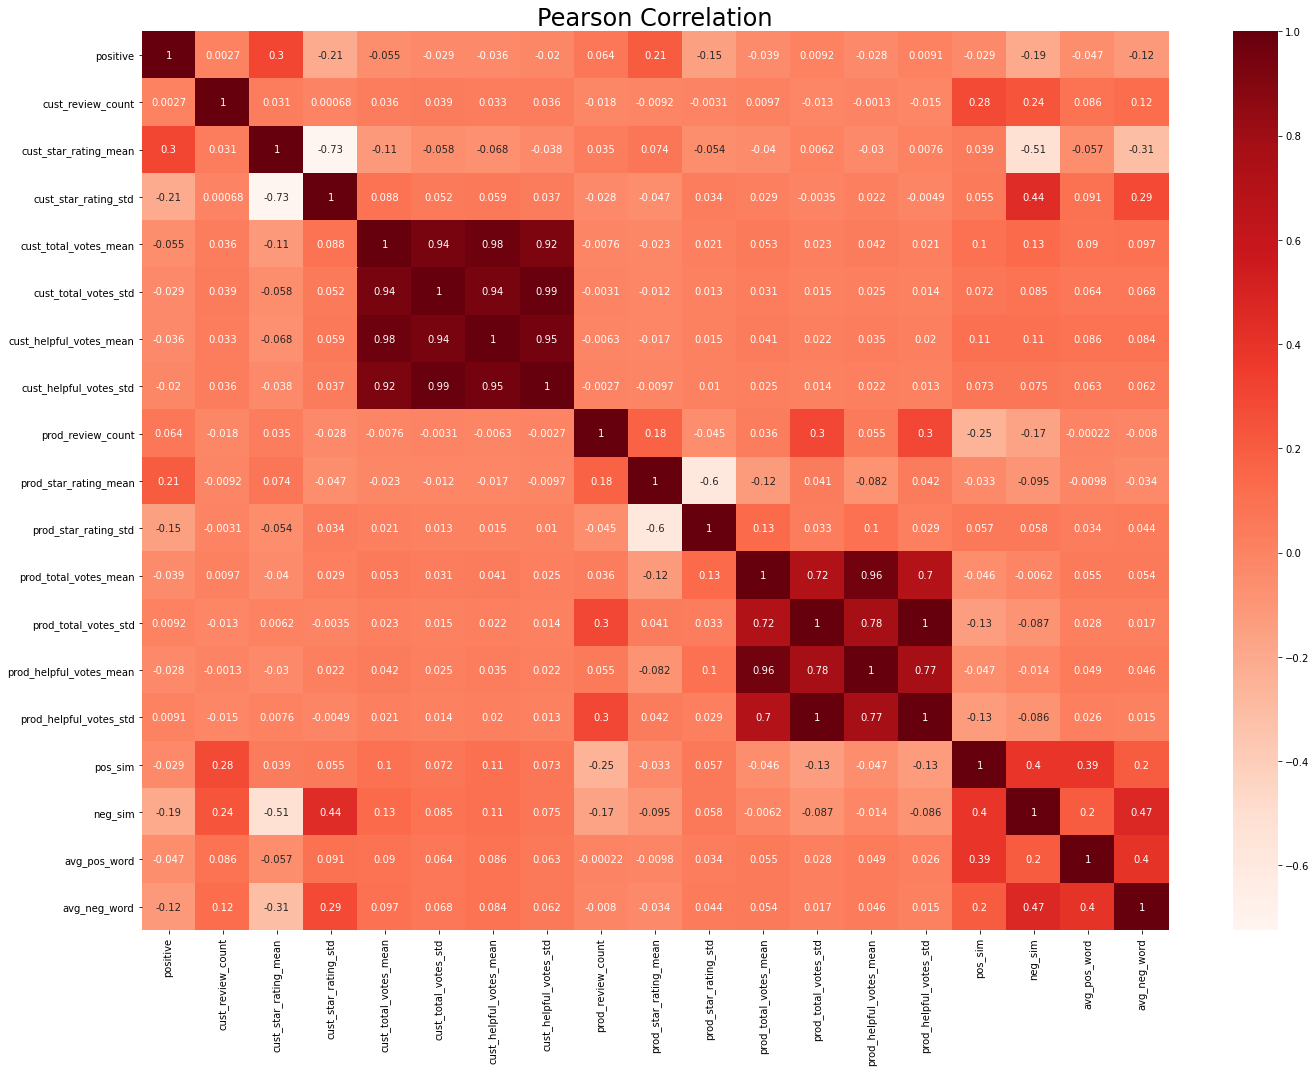

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(20,15))
plt.title('Pearson Correlation', fontdict = {'fontsize' : 24})
cor = train_df.drop(['customer_id', 'product_parent'], axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
#plt.show()
plt.tight_layout()
plt.savefig('full_set_pearson.png')

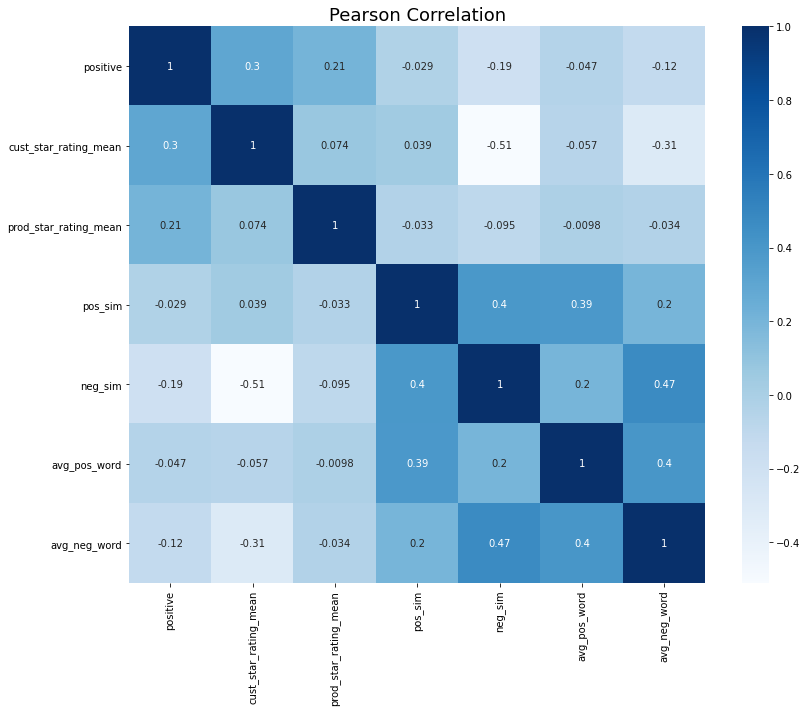

In [66]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
plt.title('Pearson Correlation', fontdict = {'fontsize' : 18})
cor = train_df.drop(drop_cols, axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
#plt.show()
plt.tight_layout()
plt.savefig('reduced_set_pearson.png')

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(train_x.drop(drop_cols, axis=1), train_y)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [16]:
gb.score(test_x.drop(drop_cols, axis=1), test_y)

0.7931165140511525

In [17]:
evaluate(gb, test_x.drop(drop_cols, axis=1), test_y)

Correct: 12559 0.7931165140511525
Pos: 14450 0.9125355225765709
Star Correct: 12559 0.7931165140511525
True Positive: 11718 0.7400063151247237
True Negative: 841 0.0531101989264288
False Positive: 2732 0.17252920745184716
False Negative: 544 0.03435427849700032


In [68]:
rf = RandomForestClassifier(n_estimators=1000, criterion='entropy', n_jobs=-1)
rf.fit(train_x.drop(['customer_id', 'product_parent'], axis=1), train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [70]:
rf.score(test_x.drop(['customer_id', 'product_parent'], axis=1), test_y)

0.7914114303757499

In [72]:
evaluate(rf, test_x.drop(['customer_id', 'product_parent'], axis=1), test_y)

Correct: 12532 0.7914114303757499
Pos: 14289 0.9023681717713925
Star Correct: 12532 0.7914114303757499
True Positive: 11624 0.7340700978844332
True Negative: 908 0.057341332491316704
False Positive: 2665 0.16829807388695928
False Negative: 638 0.040290495737290814


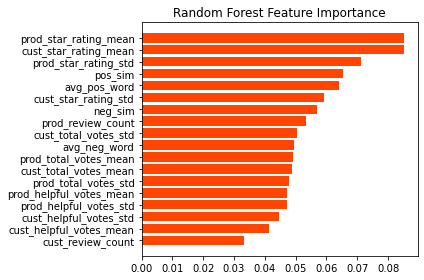

In [73]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), 
                 train_x.drop(['customer_id', 'product_parent'], axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.title('Random Forest Feature Importance')
plt.barh(labl, imp, linewidth=5, color='orangered')
plt.tight_layout()
plt.savefig('full_set_rf.png')

In [22]:
rf2 = RandomForestRegressor(n_estimators=1000, n_jobs=-1)
rf2.fit(train_x.drop(drop_cols, axis=1), train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [23]:
rf2.score(test_x.drop(drop_cols, axis=1), test_y)

0.09999458658866779

In [24]:
evaluate(rf2, test_x.drop(drop_cols, axis=1), test_y)

Correct: 12339 0.7792232396589832
Pos: 14034 0.8862646037259236
Star Correct: 37 0.0023365961477739183
True Positive: 11400 0.7199242185033154
True Negative: 939 0.059299021155667826
False Positive: 2634 0.16634038522260813
False Negative: 862 0.05443637511840859


<BarContainer object of 6 artists>

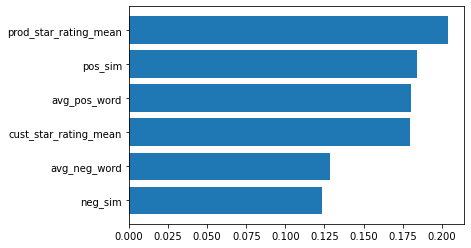

In [25]:
imp_tuples = sorted(zip(map(lambda x: round(x, 4), rf2.feature_importances_), 
                 train_x.drop(drop_cols, axis=1).columns), reverse=False)
imp = [t[0] for t in imp_tuples]
labl = [t[1] for t in imp_tuples]
plt.barh(labl, imp, linewidth=5)

In [26]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1, weights='distance')
knn.fit(train_x.drop(drop_cols, axis=1), train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='distance')

In [27]:
knn.score(test_x.drop(drop_cols, axis=1), test_y)

0.6941585096305652

In [28]:
evaluate(knn, test_x.drop(drop_cols, axis=1), test_y)

Correct: 10992 0.6941585096305652
Pos: 12063 0.7617934954215346
Star Correct: 10992 0.6941585096305652
True Positive: 9741 0.6151562993369118
True Negative: 1251 0.0790022102936533
False Positive: 2322 0.14663719608462267
False Negative: 2521 0.15920429428481211


In [42]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(train_x.drop(drop_cols, axis=1), train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [43]:
gnb.score(test_x.drop(drop_cols, axis=1), test_y)

0.7442374486896116

In [44]:
evaluate(gnb, test_x.drop(drop_cols, axis=1), test_y)

Correct: 11785 0.7442374486896116
Pos: 12476 0.7878749605304705
Star Correct: 11785 0.7442374486896116
True Positive: 10344 0.6532365014209031
True Negative: 1441 0.09100094726870855
False Positive: 2132 0.13463845910956743
False Negative: 1918 0.12112409220082096


In [32]:
from keras import models
from keras import layers
from keras import optimizers
from keras.utils import to_categorical
import keras
import numpy as np

Using TensorFlow backend.


In [33]:
keras.backend.clear_session()

In [34]:
nn_train_x = train_x.drop(drop_cols, axis=1)
nn_test_x = test_x.drop(drop_cols, axis=1)

In [35]:
np.shape(nn_train_x)

(47722, 6)

In [36]:
network = models.Sequential()
network.add(layers.Dense(4, activation='relu', input_shape=(6,)))
network.add(layers.Dense(3, activation='relu', input_shape=(4,)))
network.add(layers.Dense(2, activation='relu', input_shape=(3,)))
network.add(layers.Dense(1, activation='sigmoid', input_shape=(2,)))
network.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 28        
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 15        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 3         
Total params: 54
Trainable params: 54
Non-trainable params: 0
_________________________________________________________________


In [37]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'])

epochs = 150
history = network.fit(nn_train_x, 
                      train_y, 
                      epochs=epochs, 
                      batch_size=128, 
                      validation_data=(nn_test_x, test_y))

Train on 47722 samples, validate on 15835 samples
Epoch 1/150
47722/47722 [==============================] - 1s 26us/step - loss: 0.4887 - accuracy: 0.8003 - val_loss: 0.5061 - val_accuracy: 0.7744
Epoch 2/150
47722/47722 [==============================] - 1s 19us/step - loss: 0.4700 - accuracy: 0.8003 - val_loss: 0.4994 - val_accuracy: 0.7746
Epoch 3/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4637 - accuracy: 0.8008 - val_loss: 0.4911 - val_accuracy: 0.7766
Epoch 4/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4581 - accuracy: 0.8032 - val_loss: 0.4828 - val_accuracy: 0.7838
Epoch 5/150
47722/47722 [==============================] - 1s 19us/step - loss: 0.4533 - accuracy: 0.8053 - val_loss: 0.4777 - val_accuracy: 0.7882
Epoch 6/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4496 - accuracy: 0.8062 - val_loss: 0.4747 - val_accuracy: 0.7893
Epoch 7/150
47722/47722 [==============================] - 1s 

Epoch 56/150
47722/47722 [==============================] - 1s 19us/step - loss: 0.4387 - accuracy: 0.8089 - val_loss: 0.4660 - val_accuracy: 0.7910
Epoch 57/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4387 - accuracy: 0.8093 - val_loss: 0.4641 - val_accuracy: 0.7931
Epoch 58/150
47722/47722 [==============================] - 1s 19us/step - loss: 0.4384 - accuracy: 0.8088 - val_loss: 0.4645 - val_accuracy: 0.7922
Epoch 59/150
47722/47722 [==============================] - 1s 19us/step - loss: 0.4386 - accuracy: 0.8094 - val_loss: 0.4646 - val_accuracy: 0.7925
Epoch 60/150
47722/47722 [==============================] - 1s 19us/step - loss: 0.4386 - accuracy: 0.8095 - val_loss: 0.4640 - val_accuracy: 0.7928
Epoch 61/150
47722/47722 [==============================] - 1s 18us/step - loss: 0.4383 - accuracy: 0.8091 - val_loss: 0.4646 - val_accuracy: 0.7920
Epoch 62/150
47722/47722 [==============================] - 1s 19us/step - loss: 0.4385 - accuracy: 0.8093

Epoch 111/150
47722/47722 [==============================] - 1s 27us/step - loss: 0.4383 - accuracy: 0.8100 - val_loss: 0.4674 - val_accuracy: 0.7915
Epoch 112/150
47722/47722 [==============================] - 1s 20us/step - loss: 0.4380 - accuracy: 0.8093 - val_loss: 0.4657 - val_accuracy: 0.7924
Epoch 113/150
47722/47722 [==============================] - 1s 29us/step - loss: 0.4382 - accuracy: 0.8093 - val_loss: 0.4634 - val_accuracy: 0.7937
Epoch 114/150
47722/47722 [==============================] - 1s 21us/step - loss: 0.4383 - accuracy: 0.8094 - val_loss: 0.4637 - val_accuracy: 0.7929
Epoch 115/150
47722/47722 [==============================] - 1s 31us/step - loss: 0.4382 - accuracy: 0.8096 - val_loss: 0.4649 - val_accuracy: 0.7924
Epoch 116/150
47722/47722 [==============================] - 1s 21us/step - loss: 0.4380 - accuracy: 0.8101 - val_loss: 0.4639 - val_accuracy: 0.7930
Epoch 117/150
47722/47722 [==============================] - 1s 28us/step - loss: 0.4383 - accuracy:

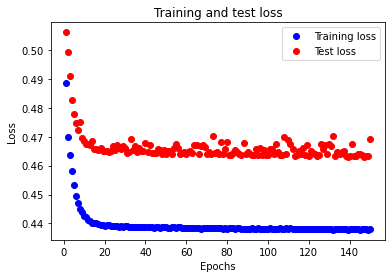

In [38]:
history_dict = history.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)
plt.plot(epochs_range, loss_values, 'bo', label='Training loss')
plt.plot(epochs_range, test_loss_values, 'ro', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

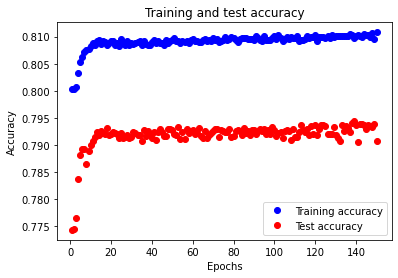

In [39]:
acc_values = history_dict['accuracy']
test_acc_values = history_dict['val_accuracy']
plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [40]:
correct = 0
pos_count = 0
star_cor = 0
matrix = [0, 0, 0, 0]
preds = network.predict(nn_test_x)
for i in range(len(test_y)):
    if (preds[i] > 0.5):
        pos_count += 1
    if (preds[i] == test_y.iloc[i]):
        star_cor += 1
    if (preds[i] > 0.5 and test_y.iloc[i] > 0.5):
        correct += 1
        matrix[0] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] <= 0.5):
        correct += 1
        matrix[1] += 1
    elif (preds[i] > 0.5 and test_y.iloc[i] <= 0.5):
        matrix[2] += 1
    elif (preds[i] <= 0.5 and test_y.iloc[i] > 0.5):
        matrix[3] += 1

print('Correct:', correct, correct / len(test_df))
print('Pos:', pos_count, pos_count / len(test_df))
print('Star Correct:', star_cor, star_cor / len(test_df))
print('True Positive:', matrix[0], matrix[0] / len(test_df))
print('True Negative:', matrix[1], matrix[1] / len(test_df))
print('False Positive:', matrix[2], matrix[2] / len(test_df))
print('False Negative:', matrix[3], matrix[3] / len(test_df))

Correct: 12523 0.7908430691506158
Pos: 14254 0.9001578781180928
Star Correct: 0 0.0
True Positive: 11602 0.7326807704452163
True Negative: 921 0.058162298705399434
False Positive: 2652 0.16747710767287655
False Negative: 660 0.04167982317650774


In [45]:
network.save('basic_neural_net8.h5')